In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
cpus = tf.config.list_physical_devices('CPU')
gpus = tf.config.list_physical_devices('GPU')
tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])

In [3]:
def extract(path):
    df = pd.concat([pd.read_csv(os.path.join(path, file)) for file in os.listdir(path)])
    features = df.copy()
    labels = features.pop('agent_action')
    return np.array(features), np.array(labels)

In [4]:
path = 'ftg-data/Dataset/BlackMamba/'

features, labels = extract(os.path.join(path, 'trainset-new'))

In [5]:
class_names = ['neutral', 'stand', 'forward_walk', 'dash', 'back_step', 'crouch', 'jump', 'for_jump', 'back_jump', 'air'
               , 'stand_guard', 'crouch_guard', 'air_guard', 'stand_guard_recov', 'crouch_guard_recov', 'air_guard_recov'
               , 'stand_recov', 'crouch_recov', 'air_recov', 'change_down', 'down', 'rise', 'landing', 'throw_a', 'throw_b'
               , 'throw_hit', 'throw_suffer', 'stand_a', 'stand_b', 'crouch_a', 'crouch_b', 'air_a', 'air_b', 'air_da', 'air_db'
               , 'stand_fa', 'stand_fb', 'crouch_fa', 'crouch_fb', 'air_fa', 'air_fb', 'air_ua', 'air_ub', 'stand_d_df_fa'
               , 'stand_d_df_fb', 'stand_f_d_dfa', 'stand_f_d_dfb', 'stand_d_db_ba', 'stand_d_db_bb', 'air_d_df_fa'
               , 'air_d_df_fb', 'air_f_d_dfa', 'air_f_d_dfb', 'air_d_db_ba', 'air_d_db_bb', 'stand_d_df_fc']

In [6]:
# labels = np.array([class_names.index(x.lower()) for x in labels])
features.shape

(112368, 145)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(145, activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(56, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [8]:
history = model.fit(features, labels, epochs=10)
model.save(os.path.join(path, 'saved_model/model.h5'))

Epoch 1/10
3512/3512 [==============================] - 11s 3ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9591
Epoch 2/10
3512/3512 [==============================] - 10s 3ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9869
Epoch 3/10
3512/3512 [==============================] - 11s 3ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9903
Epoch 4/10
3512/3512 [==============================] - 12s 3ms/step - loss: 0.0271 - sparse_categorical_accuracy: 0.9921
Epoch 5/10
3512/3512 [==============================] - 12s 4ms/step - loss: 0.0242 - sparse_categorical_accuracy: 0.9930
Epoch 6/10
3512/3512 [==============================] - 13s 4ms/step - loss: 0.0203 - sparse_categorical_accuracy: 0.9942: 1s - loss: 0.0203 - sparse_catego
Epoch 7/10
3512/3512 [==============================] - 13s 4ms/step - loss: 0.0175 - sparse_categorical_accuracy: 0.9950
Epoch 8/10
3512/3512 [==============================] - 13s 4ms/step - loss: 0.0201 - sparse_categorical_accura

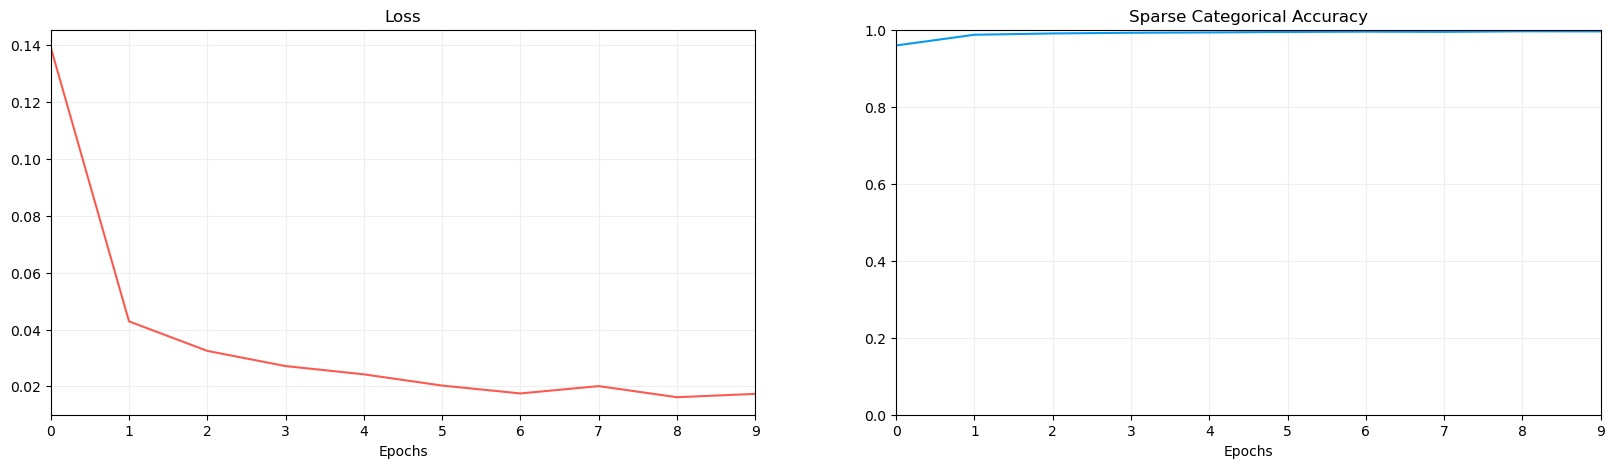

In [9]:
df = pd.DataFrame(history.history)
x = range(len(df))
mpl.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for ax in fig.get_axes():
    ax.grid(which='both', color='#eeeeee')
    # ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel('Epochs')
    ax.set_xlim([0, len(df) - 1])
# Loss
axs[0].set_title('Loss')
axs[0].plot(x, df.loss, color='xkcd:coral')
# Accuracy
axs[1].set_title('Sparse Categorical Accuracy')
axs[1].set_ylim([0, 1])
axs[1].plot(x, df.sparse_categorical_accuracy, color='xkcd:azure')